In [1]:
%load_ext autoreload
%autoreload 2

%load_ext line_profiler

#%% Change working directory from the workspace root to the ipynb file location. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
    os.chdir(r'C:\Users\kevin\Documents\Workspace\psylit-experiments\src')
    print("Changed cwd:", os.getcwd())
except:
    print("cwd:", os.getcwd())

Changed cwd: C:\Users\kevin\Documents\Workspace\psylit-experiments\src


In [2]:
# General libraries
from IPython.display import display, Markdown, Latex
import os
import sys
import logging
import itertools as it
import functools as ft
import collections as coll
import re
import json
import pathlib
import glob
import math

import scipy as sp
import sklearn as sk
import networkx as nx

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

import numpy as np
np.random.seed(0)

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 16, 10

import seaborn as sns
sns.set_context("poster", font_scale=2)
sns.set(rc={'figure.figsize': (16, 10)})
sns.set_style("whitegrid")

import plotly as py
import plotly.express as px
py.offline.init_notebook_mode()

import pandas as pd
pd.set_option("display.max_rows", 120)
pd.set_option("display.max_columns", 120)

In [3]:
from experiments.transfer_entropy import TransferEntropy_StimulusResponse as Experiment
ROOT = pathlib.Path().resolve()
DATA_ROOT = ROOT.parent  / 'data' / 'analytics'
print(ROOT)
print(DATA_ROOT)

Experiment.clear_missing_results(DATA_ROOT)

INFO:JVM:Starting JVM: 
C:\Users\kevin\Documents\Workspace\psylit-experiments\src
C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics
INFO:root:Removing entries...


In [35]:
TE = '$T^{(k)}$'#'$T^{(k)}$'
TEE = '$\eta_T^{(k)}$'
TER = '$t^{(k)}$'
TEP = '$p$'

In [36]:
results = Experiment.load_all_results(DATA_ROOT, run_col_name='Document')
results = results['persubj']

def fmt_casc(series):
    tmp = series.str.slice(2, -2).str.split("', '", expand=True)
    tmp[1][tmp[0] == 'Stimulus'] = tmp[1] + '(*)'
    return tmp[1]
    
results.Source = fmt_casc(results.Source)
results.Target = fmt_casc(results.Target)
results[TEP] = results[['apparent_te_p_value', 'apparent_te_p_value_analytical']].max(axis=1)

results['link'] = results[['Source', 'Target']].sum(axis=1)

#results['Source'] = results.Source.str.apply(fmt_casc)
#results['Target'] = results.Target.apply(fmt_casc)
#te = pd.read_csv(r'..\data\dev\experiments\tfrent_stimres\EN_1815_Peacock,ThomasLove_HeadlongHall_Novel__1\persubj.csv')
#te.index = pd.MultiIndex.from_tuples(
#    [('doc', *eval(s), *eval(t)) for i_, s, t in te[['Source','Target']].itertuples()],
#    names=['Document', 'Source Category', 'Source Feature', 'Target Category', 'Target Feature'],
#)
results.pop('Unnamed: 0')
#results.pop('Source')
results.pop('index')
#results.pop('Target')

results.rename(index=str, columns={'apparent_te': TE}, inplace=True)

results

INFO:root:Loading C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics\tfrent_stimres\EN_1771_Mackenzie,Henry_TheManofFeeling_Novel\persubj.csv
INFO:root:Loading C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics\tfrent_stimres\EN_1771_Smollett,Tobias_TheExpedictionofHenryClinker_Novel\persubj.csv
INFO:root:Loading C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics\tfrent_stimres\EN_1778_Burney,Fanny_Evelina_Novel\persubj.csv
INFO:root:Loading C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics\tfrent_stimres\EN_1782_Burney,Fanny_Cecilia_Novel\persubj.csv
INFO:root:Loading C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics\tfrent_stimres\EN_1786_Beckford,William_Vathek_Novel\persubj.csv
INFO:root:Loading C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics\tfrent_stimres\EN_1788_Wollstonecraft,Mary_Mary_Novel\persubj.csv
INFO:root:Loading C:\Users\kevin\Documents\Workspace\psylit-expe

INFO:root:Loading C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics\tfrent_stimres\EN_1893_Grand,Sarah_TheHeavenlyTwins_Novel\persubj.csv
INFO:root:Loading C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics\tfrent_stimres\EN_1893_Harraden,Beatrice_ShipsThatPassintheNight_Novel\persubj.csv
INFO:root:Loading C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics\tfrent_stimres\EN_1894_Freeman,MaryWilkins_Pembroke_Novel\persubj.csv
INFO:root:Loading C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics\tfrent_stimres\EN_1894_Hope,Anthony_ThePrisonerofZenda_Novel\persubj.csv
INFO:root:Loading C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics\tfrent_stimres\EN_1894_Kipling,Rudyard_TheJungleBook_Novel\persubj.csv
INFO:root:Loading C:\Users\kevin\Documents\Workspace\psylit-experiments\data\analytics\tfrent_stimres\EN_1895_Crane,Stephen_TheRedBadgeofCourage_Novel\persubj.csv
INFO:root:Loading C:\Users\kevin\Do

Source        Target  \
      Document                                                                  
0     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel     Unknown       Unknown   
1     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel     Unknown         Anger   
2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel     Unknown  Anticipation   
3     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel     Unknown       Arousal   
4     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel     Unknown       Disgust   
...                                                         ...           ...   
17452 EN_1905_Wharton,Edith_TheHouseofMirth_Novel    Valence(*)        Joy(*)   
17453 EN_1905_Wharton,Edith_TheHouseofMirth_Novel    Valence(*)    Sadness(*)   
17454 EN_1905_Wharton,Edith_TheHouseofMirth_Novel    Valence(*)   Surprise(*)   
17455 EN_1905_Wharton,Edith_TheHouseofMirth_Novel    Valence(*)      Trust(*)   
17456 EN_1905_Wharton,Edith_TheHouseofMirth_Novel    Valence(*)    Valence(*)   

                                                        $T^{(k)}$  \
      Document                                                      
0     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  0.000000e+00   
1     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  3.157578e-04   
2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  7.537910e-05   
3     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  2.843911e-04   
4     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel  2.448943e-07   
...                                                           ...   
17452 EN_1905_Wharton,Edith_TheHouseofMirth_Novel    3.419165e-03   
17453 EN_1905_Wharton,Edith_TheHouseofMirth_Novel    2.638265e-03   
17454 EN_1905_Wharton,Edith_TheHouseofMirth_Novel    2.726941e-03   
17455 EN_1905_Wharton,Edith_TheHouseofMirth_Novel    4.930015e-03   
17456 EN_1905_Wharton,Edith_TheHouseofMirth_Novel    0.000000e+00   

                                                     apparent_te_p_value  \
      Document                                                             
0     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel                 1.00   
1     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel                 0.35   
2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel                 0.72   
3     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel                 0.30   
4     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel                 0.88   
...                                                                  ...   
17452 EN_1905_Wharton,Edith_TheHouseofMirth_Novel                   0.88   
17453 EN_1905_Wharton,Edith_TheHouseofMirth_Novel                   0.99   
17454 EN_1905_Wharton,Edith_TheHouseofMirth_Novel                   0.77   
17455 EN_1905_Wharton,Edith_TheHouseofMirth_Novel                   1.00   
17456 EN_1905_Wharton,Edith_TheHouseofMirth_Novel                   1.00   

                                                     apparent_te_p_value_analytical  \
      Document                                                                        
0     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel                        1.000000   
1     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel                        0.124353   
2     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel                        0.607956   
3     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel                        0.152964   
4     EN_1771_Mackenzie,Henry_TheManofFeeling_Novel                        0.998385   
...                                                                             ...   
17452 EN_1905_Wharton,Edith_TheHouseofMirth_Novel                          1.000000   
17453 EN_1905_Wharton,Edith_TheHouseofMirth_Novel                          1.000000   
17454 EN_1905_Wharton,Edith_TheHouseofMirth_Novel                          1.000000   
17455 EN_1905_Wharton,Edith_TheHouseofMirth_Novel                          1.000000   
17456 EN_1905_Wharton,Edith_TheHouseofMirth_Novel                       

In [37]:
results.reset_index('Document').groupby('k').Document.nunique()

k
1     75
3     75
5      1
7      1
9      1
11     1
12    74
Name: Document, dtype: int64

In [38]:
results = results[~results.k.isin([5,7,9,11])]

In [104]:
dfm = results.reset_index().groupby(['Source','Target','k']).mean().reset_index()
dfm['link'] = dfm[['Source', 'Target']].sum(axis=1)
SIGNIF = 'Significance'
ALPHA = '$alpha$'
dfm[SIGNIF] = '$p \geq 0.05$'
dfm[ALPHA] = np.nan
for alpha in [0.05, 0.01, 0.005, 0.001]:
    dfm.loc[dfm[TEP] < alpha, SIGNIF] = f'$p \le {alpha}$'
    dfm.loc[dfm[TEP] < alpha, ALPHA] = alpha
dfm

Source      Target   k  $T^{(k)}$  apparent_te_p_value  \
0          Anger       Anger   1   0.000000             1.000000   
1          Anger       Anger   3   0.000000             1.000000   
2          Anger       Anger  12   0.000000             1.000000   
3          Anger    Anger(*)   1   0.000045             0.518057   
4          Anger    Anger(*)   3   0.000097             0.464733   
...          ...         ...  ..        ...                  ...   
1582  Valence(*)     Valence   3   0.000444             0.452086   
1583  Valence(*)     Valence  12   0.003010             0.610715   
1584  Valence(*)  Valence(*)   1   0.000000             1.000000   
1585  Valence(*)  Valence(*)   3   0.000000             1.000000   
1586  Valence(*)  Valence(*)  12   0.000000             1.000000   

      apparent_te_p_value_analytical             n       $p$  \
0                           1.000000  30463.353325  1.000000   
1                           1.000000  29834.507171  1.000000   
2                           1.000000  30167.145749  1.000000   
3                           0.525789  30463.353325  0.579830   
4                           0.776491  29834.507171  0.787709   
...                              ...           ...       ...   
1582                        0.272969  29834.507171  0.452276   
1583                        1.000000  30167.145749  1.000000   
1584                        1.000000  30463.353325  1.000000   
1585                        1.000000  29834.507171  1.000000   
1586                        1.000000  30167.145749  1.000000   

                      link   Significance  $alpha$  
0               AngerAnger  $p \geq 0.05$      NaN  
1               AngerAnger  $p \geq 0.05$      NaN  
2               AngerAnger  $p \geq 0.05$      NaN  
3            AngerAnger(*)  $p \geq 0.05$      NaN  
4            AngerAnger(*)  $p \geq 0.05$      NaN  
...                    ...            ...      ...  
1582     Valence(*)Valence  $p \geq 0.05$      NaN  
1583     Valence(*)Valence  $p \geq 0.05$      NaN  
1584  Valence(*)Valence(*)  $p \geq 0.05$      NaN  
1585  Valence(*)Valence(*)  $p \geq 0.05$      NaN  
1586  Valence(*)Valence(*)  $p \geq 0.05$      NaN  

[1587 rows x 11 columns]

In [75]:
dfm[SIGNIF].value_counts()

$p \geq 0.05$    1571
$p \le 0.05$       14
$p \le 0.01$        2
Name: Significance, dtype: int64

In [76]:
dfm.groupby('k')[SIGNIF].value_counts()

k   Significance 
1   $p \geq 0.05$    517
    $p \le 0.05$      11
    $p \le 0.01$       1
3   $p \geq 0.05$    525
    $p \le 0.05$       3
    $p \le 0.01$       1
12  $p \geq 0.05$    529
Name: Significance, dtype: int64

In [69]:
df = results
#, row="k", hue="k")#, aspect=15, height=.5, palette=pal)
#px.histogram(df.groupby(['link','k']).mean().reset_index(), x='p', color='k', opacity=.5, histnorm='probability density')#, norm_hist=True)
dfm = df.groupby(['link','k']).mean().reset_index()
#g = sns.FacetGrid(dfm, cols='k')
#g.map(sns.jointplot, dfm.p, dfm.apparent_te, kind='kde')
dfm

link   k  $T^{(k)}$  apparent_te_p_value  \
0         Anger(*)Anger   1   0.000040             0.618475   
1         Anger(*)Anger   3   0.000070             0.585567   
2         Anger(*)Anger  12   0.000109             0.553684   
3      Anger(*)Anger(*)   1   0.000000             1.000000   
4      Anger(*)Anger(*)   3   0.000000             1.000000   
...                 ...  ..        ...                  ...   
1582     ValenceValence   3   0.000000             1.000000   
1583     ValenceValence  12   0.000000             1.000000   
1584  ValenceValence(*)   1   0.000632             0.353064   
1585  ValenceValence(*)   3   0.000633             0.488188   
1586  ValenceValence(*)  12   0.005875             0.733144   

      apparent_te_p_value_analytical             n       $p$  
0                           0.553264  30463.353325  0.658902  
1                           0.889894  29834.507171  0.890524  
2                           1.000000  30167.145749  1.000000  
3                           1.000000  30463.353325  1.000000  
4                           1.000000  29834.507171  1.000000  
...                              ...           ...       ...  
1582                        1.000000  29834.507171  1.000000  
1583                        1.000000  30167.145749  1.000000  
1584                        0.287905  30463.353325  0.353611  
1585                        0.405721  29834.507171  0.490837  
1586                        1.000000  30167.145749  1.000000  

[1587 rows x 7 columns]

In [92]:
dfm[['k',ALPHA]].drop_duplicates()

k  $alpha$
0      1      NaN
1      3      NaN
2     12      NaN
330    1     0.05
565    3     0.05
1461   1     0.01
1462   3     0.01

In [94]:
#df = results#.droplevel(0).set_index(['Subject'], append=True)
#df.droplevel(0).set_index(pd.MultiIndex.from_tuples(df.Source.values), append=True)
#df_avg = df_avg[df_avg.apparent_te_p_value < 0.05]

#df_avg = df.groupby(['Source', 'Target']).mean().reset_index()
Tmat = dfm[dfm.k == 1].pivot(index='Source', columns='Target', values=[TE,TEP,ALPHA])
Tmat

$T^{(k)}$                                                   \
Target              Anger  Anger(*) Anticipation Anticipation(*)   Arousal   
Source                                                                       
Anger            0.000000  0.000045     0.000179        0.000070  0.000116   
Anger(*)         0.000040  0.000000     0.000070        0.000118  0.000103   
Anticipation     0.000190  0.000056     0.000000        0.000067  0.000399   
Anticipation(*)  0.000055  0.000118     0.000084        0.000000  0.000140   
Arousal          0.000552  0.000100     0.000854        0.000130  0.000000   
Arousal(*)       0.000066  0.000128     0.000106        0.000200  0.000285   
Disgust          0.000072  0.000054     0.000133        0.000056  0.000110   
Disgust(*)       0.000051  0.000139     0.000058        0.000095  0.000085   
Dominance        0.000776  0.000114     0.001182        0.000155  0.001894   
Dominance(*)     0.000093  0.000082     0.000135        0.000173  0.000300   
Fear             0.000140  0.000064     0.000212        0.000079  0.000171   
Fear(*)          0.000062  0.000151     0.000073        0.000075  0.000123   
Joy              0.000173  0.000058     0.000176        0.000073  0.000259   
Joy(*)           0.000055  0.000100     0.000090        0.000138  0.000150   
Sadness          0.000125  0.000070     0.000208        0.000073  0.000203   
Sadness(*)       0.000053  0.000136     0.000068        0.000092  0.000095   
Surprise         0.000121  0.000055     0.000122        0.000069  0.000184   
Surprise(*)      0.000052  0.000065     0.000078        0.000079  0.000114   
Trust            0.000216  0.000063     0.000294        0.000080  0.000444   
Trust(*)         0.000060  0.000093     0.000080        0.000130  0.000125   
Unknown          0.000028  0.000104     0.000036        0.000122  0.000070   
Valence          0.000880  0.000122     0.001396        0.000163  0.002769   
Valence(*)       0.000102  0.000166     0.000142        0.000187  0.000279   

                                                                        \
Target          Arousal(*)   Disgust Disgust(*) Dominance Dominance(*)   
Source                                                                   
Anger             0.000100  0.000123   0.000057  0.000329     0.000129   
Anger(*)          0.000182  0.000049   0.000165  0.000126     0.000179   
Anticipation      0.000128  0.000157   0.000054  0.000216     0.000171   
Anticipation(*)   0.000140  0.000050   0.000112  0.000176     0.000171   
Arousal           0.000257  0.000443   0.000083  0.000791     0.000395   
Arousal(*)        0.000000  0.000059   0.000135  0.000281     0.000365   
Disgust           0.000082  0.000000   0.000033  0.000255     0.000104   
Disgust(*)        0.000136  0.000033   0.000000  0.000110     0.000154   
Dominance         0.000380  0.000598   0.000092  0.000000     0.000569   
Dominance(*)      0.000218  0.000078   0.000110  0.000545     0.000000   
Fear              0.000118  0.000145   0.000052  0.000366     0.000154   
Fear(*)           0.000193  0.000049   0.000150  0.000139     0.000182   
Joy               0.000117  0.000137   0.000046  0.000151     0.000141   
Joy(*)            0.000169  0.000049   0.000100  0.000195     0.000207   
Sadness           0.000126  0.000117   0.000060  0.000439     0.000148   
Sadness(*)        0.000163  0.000043   0.000133  0.000116     0.000229   
Surprise          0.000098  0.000107   0.000048  0.000206     0.000105   
Surprise(*)       0.000122  0.000044   0.000082  0.000132     0.000149   
Trust             0.000137  0.000177   0.000054  0.000229     0.000180   
Trust(*)          0.000206  0.000051   0.000090  0.000168     0.000202   
Unknown           0.000248  0.000022   0.000090  0.000082     0.000410   
Valence           0.000411  0.000659   0.000096  0.001888     0.000611   
Valence(*)        0.000422  0.000085   0.000129  0.000374     0.000731   

                                                              

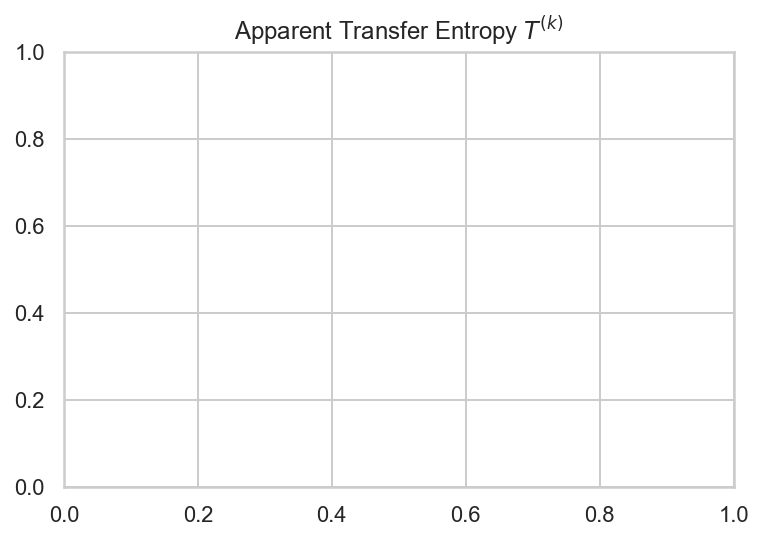

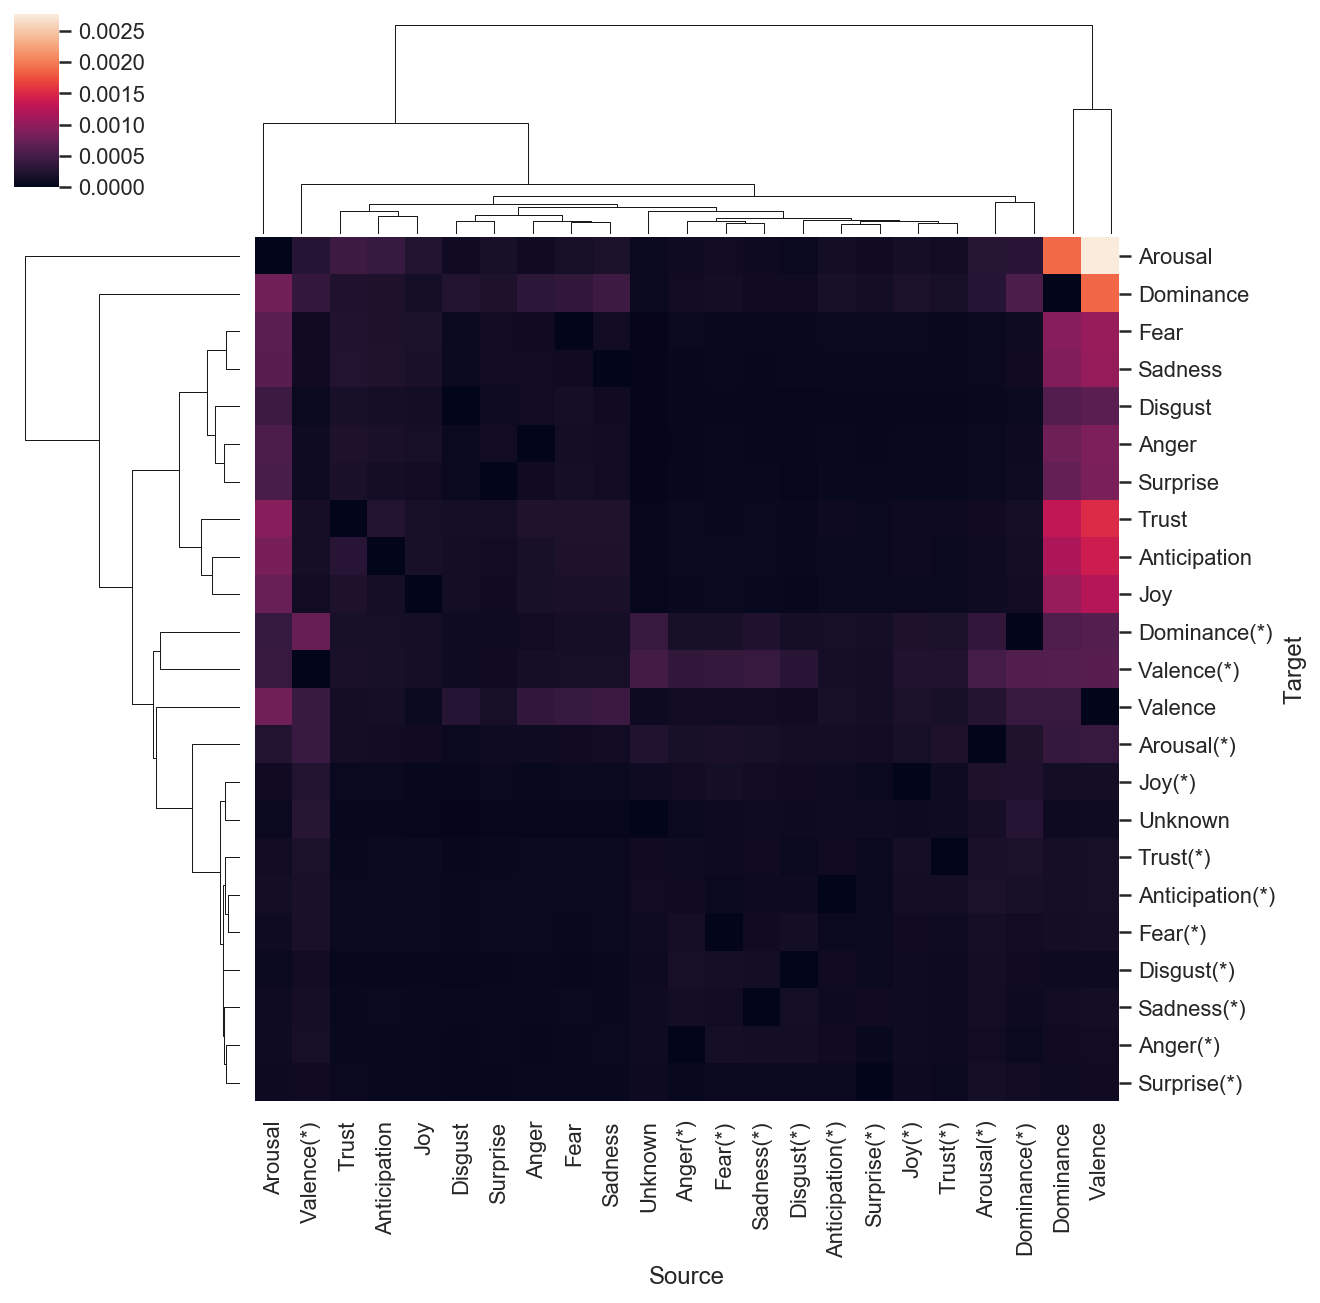

In [95]:
plt.title(f"Apparent Transfer Entropy {TE}")
sns.clustermap(Tmat[TE].T, square=True)

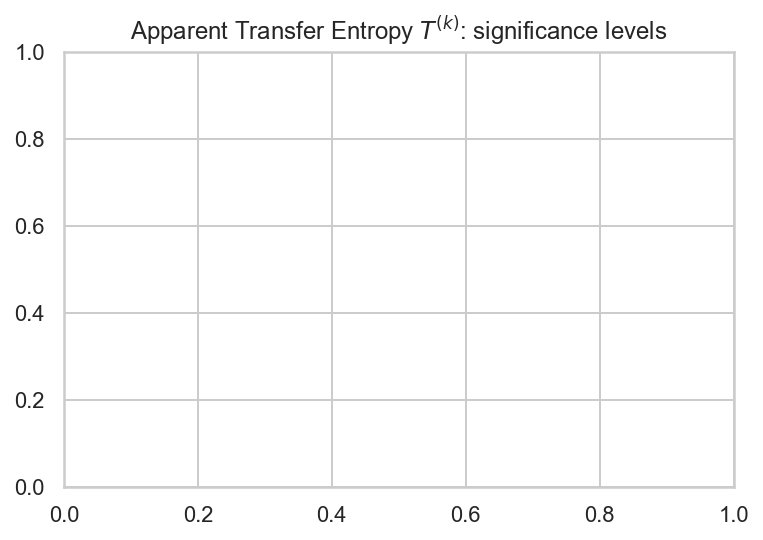

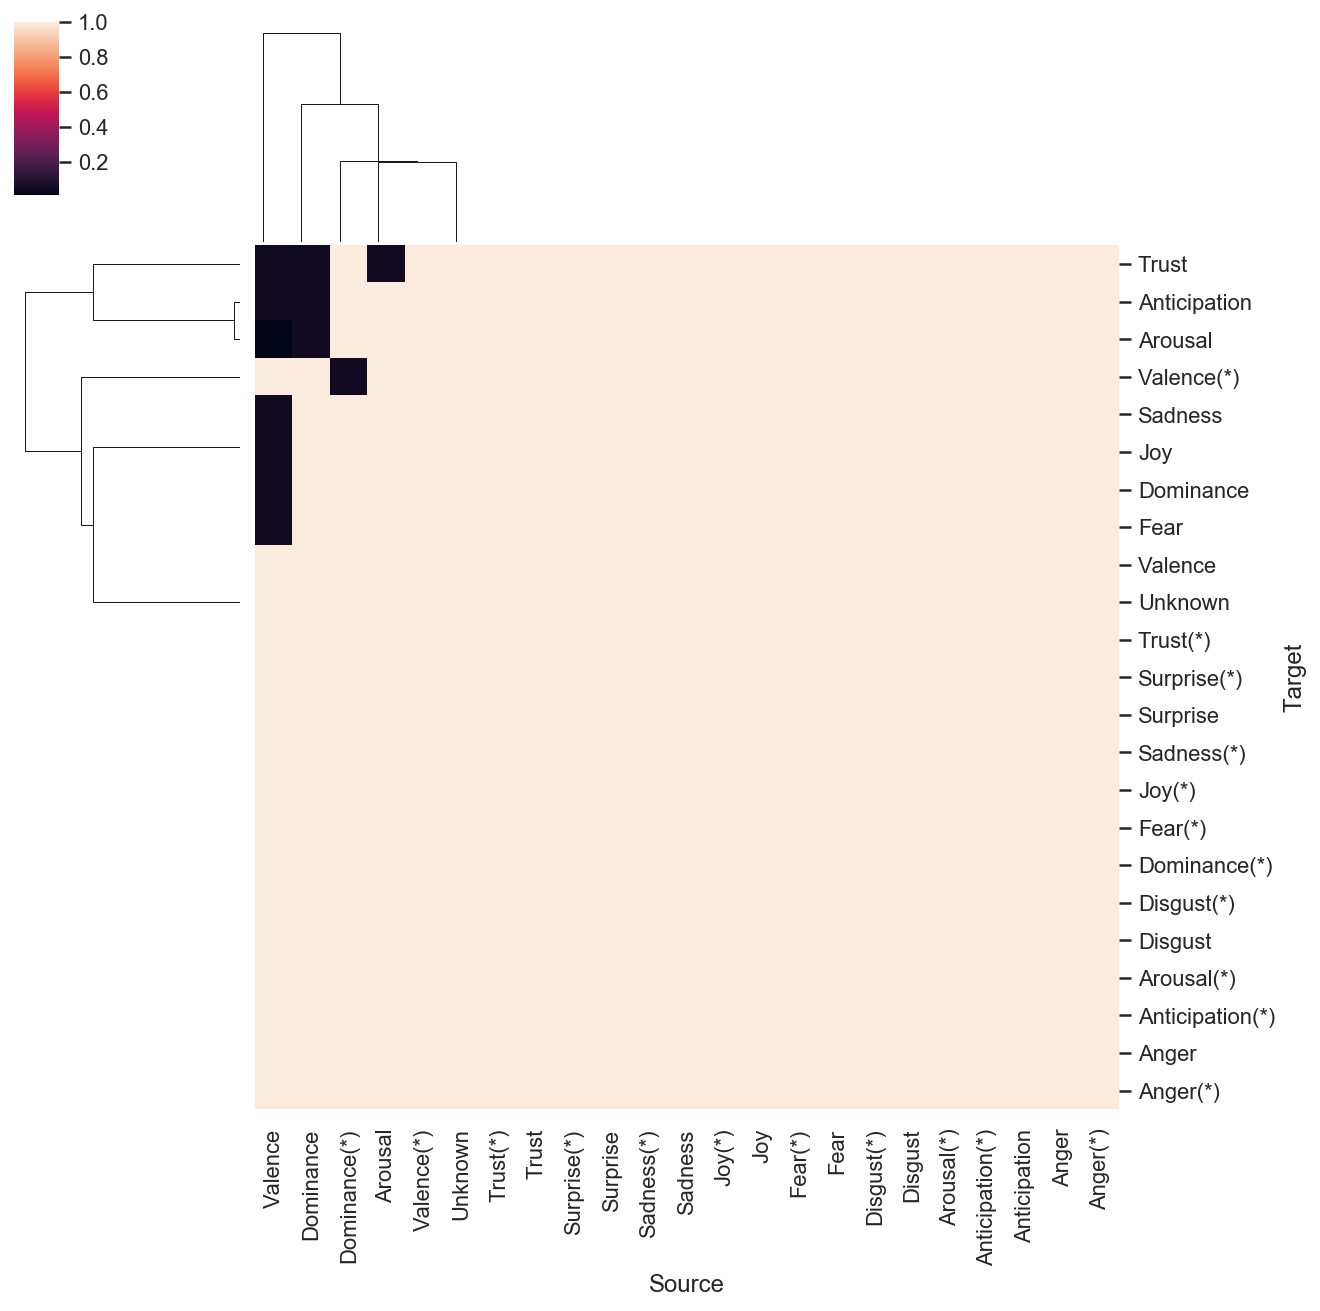

In [100]:
plt.title(f"Apparent Transfer Entropy {TE}: significance levels")
sns.clustermap(Tmat[ALPHA].fillna(1).T, square=True)

In [105]:
links = dfm#.groupby(['Source', 'Target','k']).mean()

significant_links = links[~links[ALPHA].isna()]
significant_links

Source        Target  k  $T^{(k)}$  apparent_te_p_value  \
330        Arousal         Trust  1   0.000948             0.028449   
558      Dominance  Anticipation  1   0.001182             0.027666   
564      Dominance       Arousal  1   0.001894             0.007288   
565      Dominance       Arousal  3   0.001687             0.001525   
606      Dominance         Trust  1   0.001313             0.020417   
687   Dominance(*)    Valence(*)  1   0.000587             0.040495   
1455       Valence  Anticipation  1   0.001396             0.022347   
1456       Valence  Anticipation  3   0.001387             0.009674   
1461       Valence       Arousal  1   0.002769             0.006767   
1462       Valence       Arousal  3   0.002333             0.000196   
1473       Valence     Dominance  1   0.001888             0.016232   
1474       Valence     Dominance  3   0.001441             0.011708   
1479       Valence          Fear  1   0.001056             0.037001   
1485       Valence           Joy  1   0.001238             0.034172   
1491       Valence       Sadness  1   0.001028             0.030704   
1503       Valence         Trust  1   0.001536             0.020156   

      apparent_te_p_value_analytical             n       $p$  \
330                         0.039200  30463.353325  0.040405   
558                         0.028993  30463.353325  0.030205   
564                         0.010205  30463.353325  0.010221   
565                         0.021186  29834.507171  0.021390   
606                         0.025171  30463.353325  0.025757   
687                         0.027193  30463.353325  0.040543   
1455                        0.022636  30463.353325  0.023443   
1456                        0.040728  29834.507171  0.040728   
1461                        0.008752  30463.353325  0.008773   
1462                        0.009386  29834.507171  0.009386   
1473                        0.015355  30463.353325  0.017198   
1474                        0.040205  29834.507171  0.042656   
1479                        0.039389  30463.353325  0.041001   
1485                        0.034297  30463.353325  0.035265   
1491                        0.040583  30463.353325  0.041272   
1503                        0.022256  30463.353325  0.022797   

                        link  Significance  $alpha$  
330             ArousalTrust  $p \le 0.05$     0.05  
558    DominanceAnticipation  $p \le 0.05$     0.05  
564         DominanceArousal  $p \le 0.05$     0.05  
565         DominanceArousal  $p \le 0.05$     0.05  
606           DominanceTrust  $p \le 0.05$     0.05  
687   Dominance(*)Valence(*)  $p \le 0.05$     0.05  
1455     ValenceAnticipation  $p \le 0.05$     0.05  
1456     ValenceAnticipation  $p \le 0.05$     0.05  
1461          ValenceArousal  $p \le 0.01$     0.01  
1462          ValenceArousal  $p \le 0.01$     0.01  
1473        ValenceDominance  $p \le 0.05$     0.05  
1474        ValenceDominance  $p \le 0.05$     0.05  
1479             ValenceFear  $p \le 0.05$     0.05  
1485              ValenceJoy  $p \le 0.05$     0.05  
1491          ValenceSadness  $p \le 0.05$     0.05  
1503            ValenceTrust  $p \le 0.05$     0.05

In [14]:
def make_net(links):
    tuples =  list(links.reset_index()[['Source','Target','apparent_te']].itertuples())
    #print(tuples)
    edges = [(t.Source, t.Target, t.apparent_te) for t in tuples]
    print('\n'.join(repr(e) for e in edges))
    G = nx.DiGraph()
    G.add_weighted_edges_from(edges)
    return G

G = make_net(significant_links)
#nx.drawing.nx_pylab.draw_spring(G, arrows=True, arrow_size=160, 
#                                with_labels=True, node_size=6000, 
#                                node_color='lightblue', #edge_cmap=sns.cubehelix_palette(8, start=.5, rot=-.75), 
#                                edge_color=nx.get_edge_attributes(G, 'weight'))


('Anger', 'Anger', 0.0)
('Anger', 'Anger', 0.0)
('Anger', 'Anger', 0.0)
('Anger', 'Anger(*)', 4.4614790539494465e-05)
('Anger', 'Anger(*)', 9.711640913623455e-05)
('Anger', 'Anger(*)', 0.00031804874243664507)
('Anger', 'Anticipation', 0.00017895525272720219)
('Anger', 'Anticipation', 0.00021934351386237208)
('Anger', 'Anticipation', 0.00025071956450842806)
('Anger', 'Anticipation(*)', 7.021412188403635e-05)
('Anger', 'Anticipation(*)', 0.00012715135885052594)
('Anger', 'Anticipation(*)', 0.00042921183633235903)
('Anger', 'Arousal', 0.00011574318605216641)
('Anger', 'Arousal', 0.00021684450407507695)
('Anger', 'Arousal', 0.0004413789769549925)
('Anger', 'Arousal(*)', 9.98879340205403e-05)
('Anger', 'Arousal(*)', 0.0002430685803346714)
('Anger', 'Arousal(*)', 0.001228368854580681)
('Anger', 'Disgust', 0.00012261783745392125)
('Anger', 'Disgust', 0.00012007593406585437)
('Anger', 'Disgust', 0.00013405294810270077)
('Anger', 'Disgust(*)', 5.6571477197511796e-05)
('Anger', 'Disgust(*)', 9.1

In [15]:
stimuli = results.Source[results.Source.str.endswith('(*)')].unique()
print(stimuli)
Gpos = 

SyntaxError: invalid syntax (<ipython-input-15-d00044ffd276>, line 3)

In [ ]:
import networkx as nx
nx.draw(G, pos=nx.bipartite_layout(G, stimuli), 
        node_size=1000, 
        with_labels=True, 
        node_color='lightblue', 
        font_size=12, arrow_size=20, width=2, )

In [139]:
def links_to_dot(links):
    edge_fmt = """{} -> {} [ label = "{:1.2n}" ]"""
    
    f = lambda x: x.replace('(*)','')

    s2s = [(f(s), f(t), w) for s, t, w in tuples if     s.endswith('(*)') and     t.endswith('(*)')]
    s2r = [(f(s), f(t), w) for s, t, w in tuples if     s.endswith('(*)') and not t.endswith('(*)')]
    r2s = [(f(s), f(t), w) for s, t, w in tuples if not s.endswith('(*)') and     t.endswith('(*)')]
    r2r = [(f(s), f(t), w) for s, t, w in tuples if not s.endswith('(*)') and not t.endswith('(*)')]
    oth = [(f(s), f(t), w) for s, t, w in tuples if s in {'Unknown'} or t in {'Unknown'}]
    s2s = '; '.join(edge_fmt.format(*e) for e in s2s)
    s2r = '; '.join(edge_fmt.format(*e) for e in s2r)
    r2s = '; '.join(edge_fmt.format(*e) for e in r2s)
    r2r = '; '.join(edge_fmt.format(*e) for e in r2r)
    oth = '; '.join(edge_fmt.format(*e) for e in oth)
    return """
        digraph finite_state_machine <LB>
            rankdir=LR;
            size="8,5"
            node [shape = circle];
            subgraph Stimuli <LB>
                {s2s}
            <RB>
            subgraph Response <LB>
                {r2r}
            <RB>
            {s2r}
            {r2s}
            {oth}
        <RB>
        """.format(s2s=s2s, r2r=r2r, s2r=s2r, r2s=r2s, oth=oth).replace('<LB>', '{').replace('<RB>', '}')

tuples =  [(t.Source, t.Target, t.apparent_te)
           for t in (significant_links
                     .reset_index('k')[['apparent_te']]
                     .groupby(level=[0,1])
                     .max()
                     .reset_index()
                     .itertuples())]
print(links_to_dot(tuples))


        digraph finite_state_machine {
            rankdir=LR;
            size="8,5"
            node [shape = circle];
            subgraph Stimuli {
                Anger -> Disgust [ label = "0.00068" ]; Anger -> Fear [ label = "0.0016" ]; Anger -> Joy [ label = "0.00054" ]; Anger -> Sadness [ label = "0.0016" ]; Anticipation -> Arousal [ label = "0.0018" ]; Anticipation -> Sadness [ label = "0.0018" ]; Anticipation -> Trust [ label = "0.0049" ]; Arousal -> Disgust [ label = "0.00056" ]; Disgust -> Dominance [ label = "0.0051" ]; Disgust -> Joy [ label = "0.0015" ]; Disgust -> Sadness [ label = "0.0016" ]; Disgust -> Valence [ label = "0.0014" ]; Dominance -> Valence [ label = "0.0015" ]; Fear -> Anger [ label = "0.0007" ]; Fear -> Disgust [ label = "0.00052" ]; Fear -> Joy [ label = "0.0017" ]; Fear -> Sadness [ label = "0.0016" ]; Joy -> Dominance [ label = "0.00055" ]; Joy -> Trust [ label = "0.00058" ]; Sadness -> Anger [ label = "0.0014" ]; Sadness -> Disgust [ label = "0.000

In [145]:
from graphviz import Source
dot_src = Source(links_to_dot(tuples))
dot_src

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [146]:
%%latex
$T^{(k)}_{X\rightarrow Y} = H(y_i | y_i^{(k)}) - H(y_i | y_i^{(k)}, x_i^{(k)})$

<IPython.core.display.Latex object>

In [147]:
nodes = ['a','b','c','d']
edges = [('a','b'), ('a','c'), ('c','d'),('d','b')]
gender = ['f', 'm', 'f', 'm']
colors = {'m': 'blue', 'f': 'red'}

style = {}
style['node_label'] = ['Alice', 'Bob', 'Claire', 'Dennis']
style['node_color'] = [colors[g] for g in gender]
style['node_opacity'] = .5
style['edge_curved'] = .1

from network2tikz import plot
plot((nodes,edges))#,'network.tex',**style)

ERROR:network2tikz.plot:No LaTex compiler was found! Either specify a LaTex compiler or make sure you have latexmk or pdfLaTex installed.


CnetError: 

In [16]:
#Tp_sg = (Tp < .05)
#Tmat[Tp_sg].unstack().dropna()
dfm.groupby(['Source','Target','k'])

KeyError: 'Source'

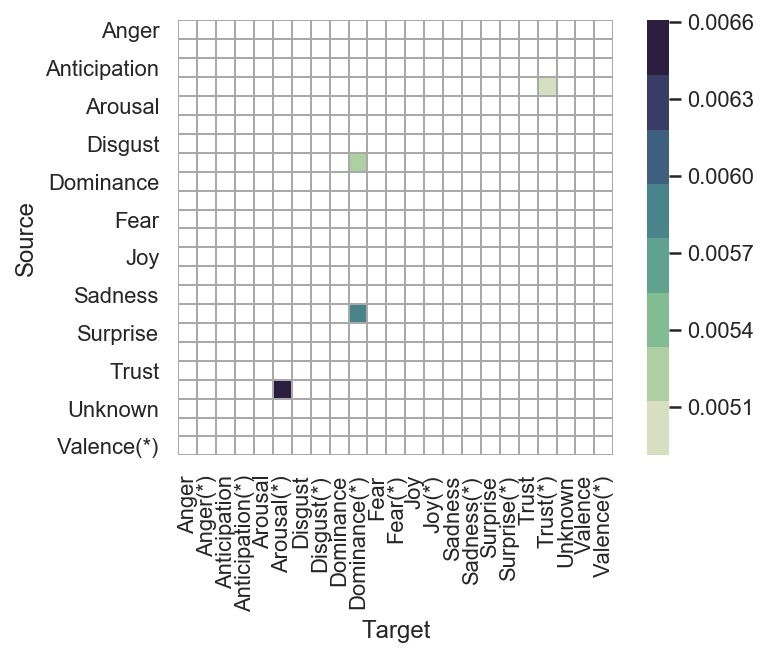

In [14]:
sns.heatmap(T[Tp_sg], annot=False, cmap=sns.cubehelix_palette(8, start=.5, rot=-.75), linewidths=.5, square=True, linecolor='darkgrey')

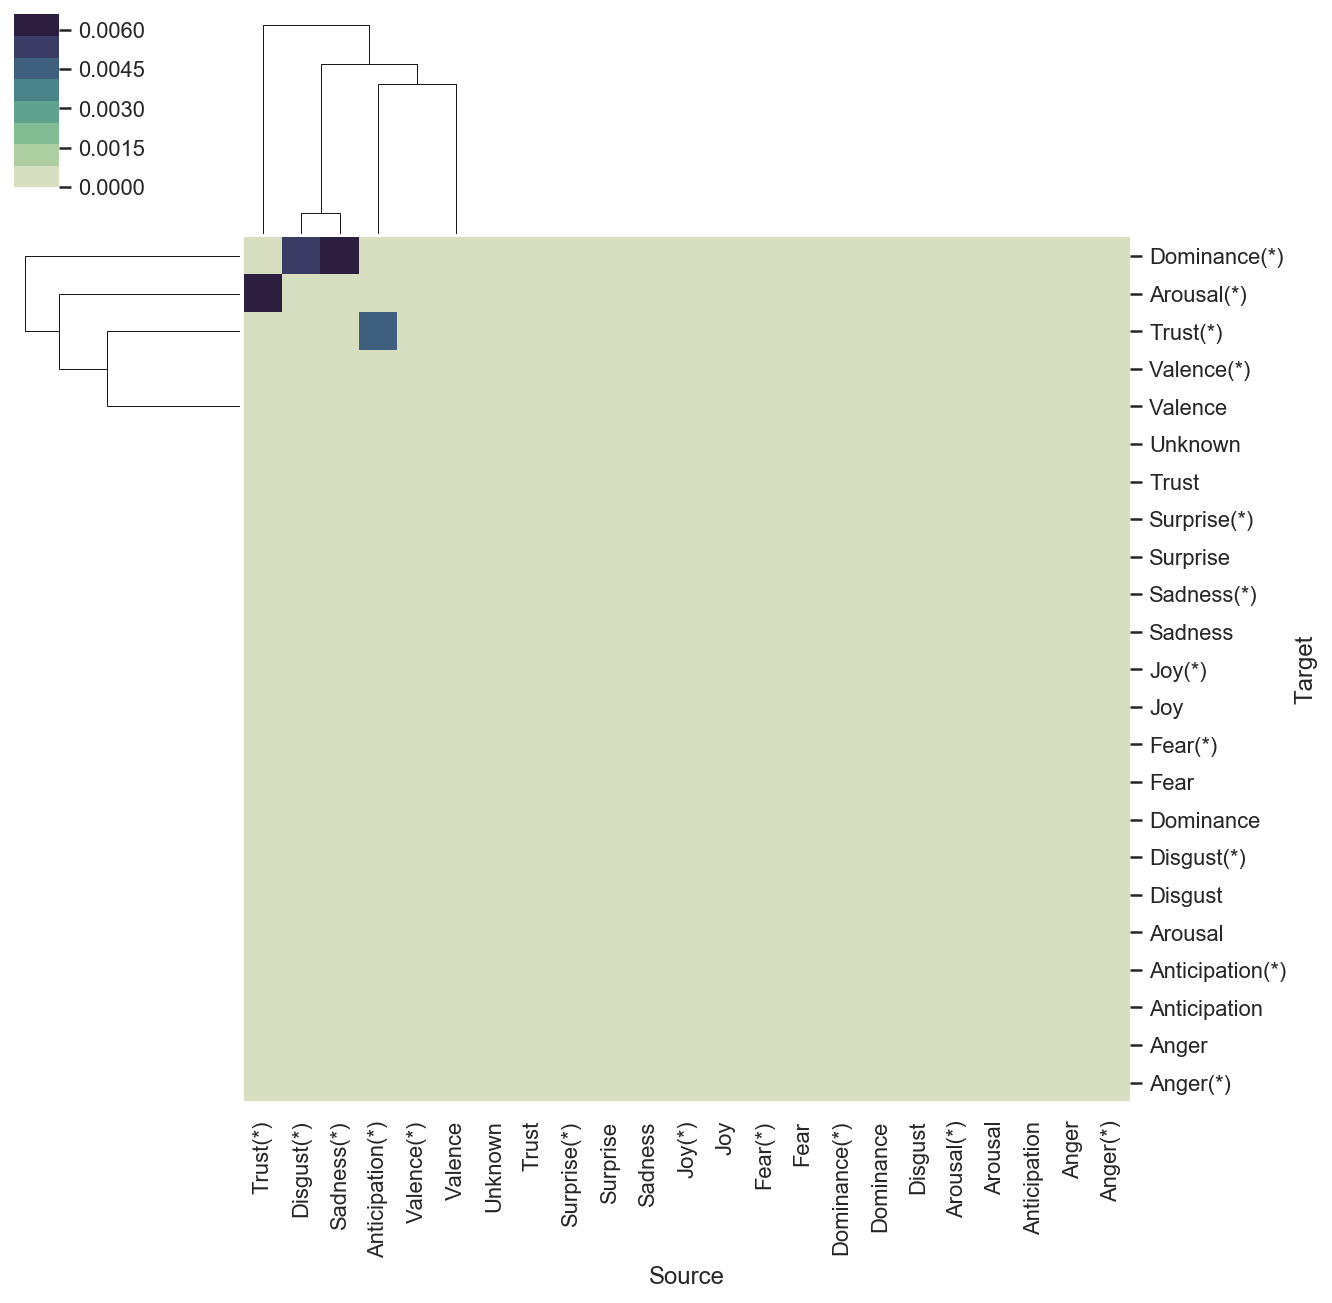

In [15]:
#sns.clustermap(Tp[Tp_sgft], annot=False, metric='cosine')#(T - T.T), fmt="d")

sns.clustermap(T[Tp_sg].T.fillna(0), annot=False, cmap=sns.cubehelix_palette(8, start=.5, rot=-.75))#, metric='cosine')#(T - T.T), fmt="d")

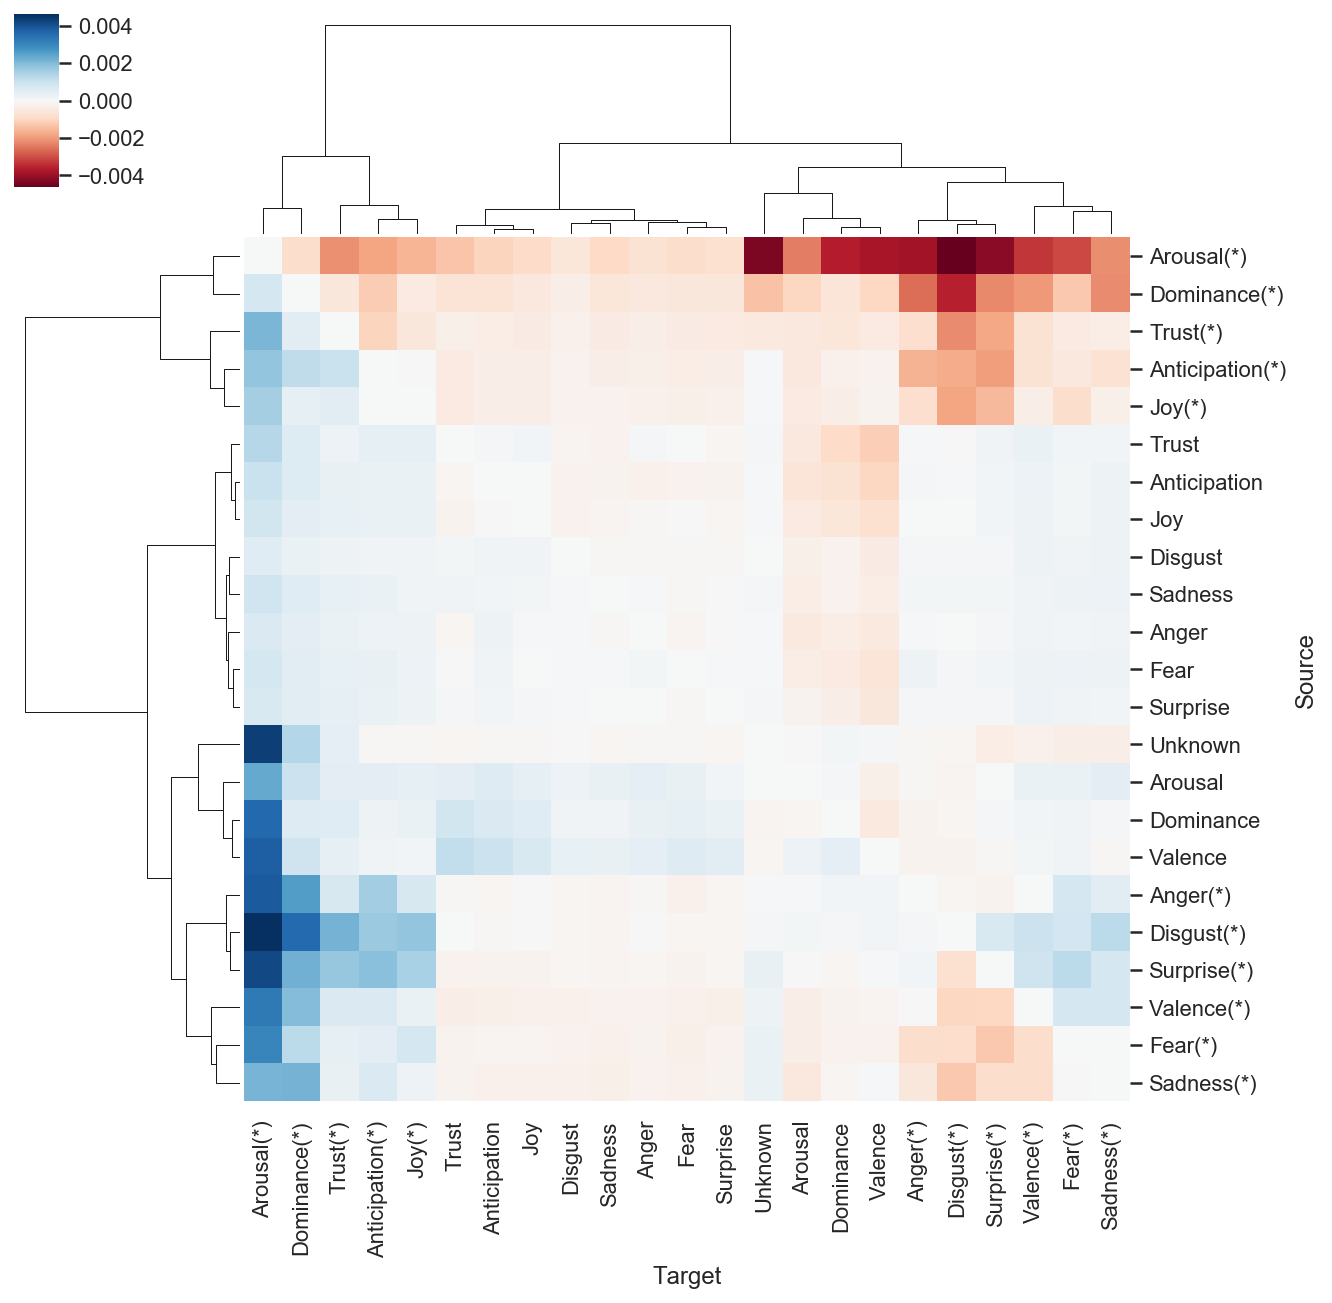

In [16]:
sns.clustermap((T - T.T), annot=False, cmap='RdBu', metric='cosine')#(T - T.T), fmt="d")

In [17]:
mcsr.casc[[('Stimulus','Fear')]].to_numpy()

NameError: name 'mcsr' is not defined

In [ ]:
fmt_node = lambda cat, feat: f"{feat.upper()}\n({cat.lower()})"
edges = [
    (fmt_node(*eval(x.Source)), fmt_node(*eval(x.Target)), x.apparent_te) 
    for x in df_avg[df_avg.apparent_te_p_value < 0.05].itertuples()
]
G = nx.DiGraph()
G.add_weighted_edges_from(edges)

TypeError: float() argument must be a string or a number, not 'tuple'

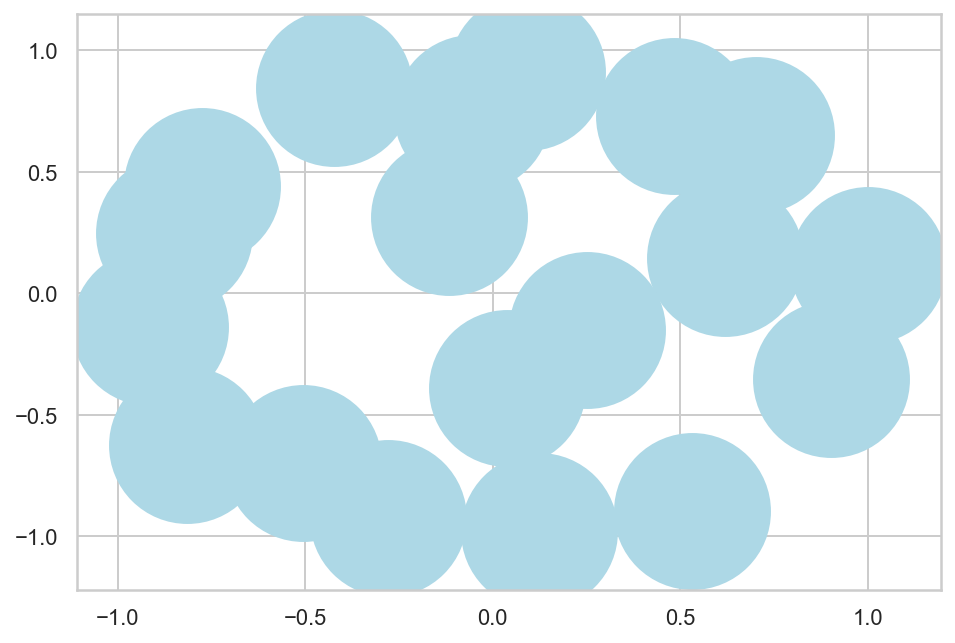

In [63]:
nx.drawing.nx_pylab.draw_spring(G, arrows=True, arrow_size=160, 
                                with_labels=True, node_size=6000, 
                                node_color='lightblue', #edge_cmap=sns.cubehelix_palette(8, start=.5, rot=-.75), 
                                edge_color=nx.get_edge_attributes(G, 'weight'))

In [ ]:
df = results.droplevel(0).set_index(['Subject'], append=True
                                    
df[ENT_RATE] = df[BLOCK_ENT] / df['k']
df[EXCESS_ENT] = df[BLOCK_ENT] - df['k'] * df[ENT_RATE]
#df['n'] = df.groupby(level=[0,1]).size().reset_index()
m = 2
alp_len = 2**m
log_alp_len = math.log(alp_len, 2)
left=n * df[BLOCK_ENT]
right=df.k * alp_len ** df.k * log_alp_len

df = df.assign(
    n=n,
    reliability=left.ge(right).replace({True: 'Reliable', False: 'Unreliable'}).astype('category'),
)
reliable = df.reliability == 'Reliable'
df.head()

In [ ]:
from models.cascades import MultiCascades, FEATURE_TRANSFORMERS
from utils.io import file_parts

CASC_ROOT = ROOT.parent / 'data' / 'processed' / 'train'
casc_files = list(CASC_ROOT.glob('**/*.csv*'))
print(len(casc_files), 'cascade files')
docs = set(df.index.get_level_values('Document').unique())
print(len(docs), 'docs')
casc_files = [p for p in casc_files if file_parts(p)[0] in docs]
mc = MultiCascades.from_csvs(casc_files, document_col='Document')
transform_function = FEATURE_TRANSFORMERS['StimulusResponse']
mcsr = transform_function(mc)
mcsr

In [ ]:
display(Markdown("""## Average frequency per sample"""))
print(f"{len(mcsr.subjects)} subjects")
print(f"{mcsr.n_rows} data points ({mcsr.n_rows / len(mcsr.subjects)} / subject)")

subjects = mcsr.casc.groupby(level=['Document', 'Subject'])
freq = subjects.sum()
freq.mean()

In [ ]:
from models.info_dynamics import apparent_tfr_entropy
narr_twocities = mcsr.casc.droplevel('t').loc[('NARRATOR', 'EN_1859_Dickens,Charles_ATaleofTwoCities_Novel'),:]
r = apparent_tfr_entropy(narr_twocities, ('Stimulus', 'Valence'), ('Response', 'Valence'), k=20)
r

In [ ]:
mcsr.casc[('Other', 'Unknown')].to_numpy()

In [ ]:
##### SNIPPETS

## int to str/categorical
casc.casc.replace({0:'0',1:'1'}).astype('str')#.astype('category')

## group cascades into symbols
def casc_to_str_seq(casc):
    return pd.Series([
        ''.join(map(str, t))
        for t in casc.replace({0:'0',1:'1'}).astype('str').itertuples(index=False)
    ], index=casc.index)
symb = casc.casc.groupby(level='Subject', group_keys=False).apply(casc_to_str_seq)
symb_int = symb.astype('category').cat.codes#.T['NARRATOR','4']

## generate multiple initial conditions
all_series = np.array([casc.casc.to_numpy() for lbl, g in symb_int.groupby(level='Subject', group_keys=False)])
all_series.shape
pd.Series(series).value_counts()

In [ ]:
from pyinform import transferentropy as te

def transfer_entropies(casc, source_cols=None, destination_cols=None, traj_col=None, **kwargs):
    all_cols = list(casc.columns)
    source_cols = source_cols or all_cols
    destination_cols = destination_cols or all_cols
    
    rows = []
    for sc in source_cols:
        row = {'source': sc, 
               **{dc:te.transfer_entropy(casc[sc], casc[dc], **kwargs) for dc in destination_cols }}
        rows.append(row)
    df = pd.DataFrame(rows)
    df.set_index('source', inplace=True, verify_integrity=True)
    return df


k = 1
T = transfer_entropies(casc.casc, k=k)
T

In [ ]:
casc = pairs_casc.copy()
response_ident = 'Agent Subject'
stim_prefix = "[S] "
resp_prefix = "[R] "
new_names = {
    c: resp_prefix+c.replace(response_ident, '') if c.startswith(response_ident) else stim_prefix+c 
    for c in casc.columns
}
casc.rename(index=str, columns=new_names, inplace=True)
stim_cols = [c for c in casc.columns if c.startswith(stim_prefix)]
resp_cols = [c for c in casc.columns if c.startswith(resp_prefix)]
#casc.columns = pd.MultiIndex.from_tuples(
#    tuple([('Response' if c.startswith('Agent Subject') else 'Stimulus'), *c.split()][::-1])
#    for c in casc.columns
#)
#casc.T.groupby(level=[3,0]).any().astype(int).T


In [ ]:
import plotly as py
import plotly.graph_objs as go

def get_traces(casc):
    ent_casc_cols = [c for c in casc.columns if not c.startswith('L_')]
    for ecol in ent_casc_cols:
        if ecol not in casc.columns:
            print('Ignoring col', ecol)
            continue
        mask = casc[lex_cols][casc[ecol] == 1] == 1
        trace_data = [(c, mask.index[mask[c]]) for c in lex_cols]
        #trace_data = np.array([[v.to_numpy(), [k]*len(v)] for k, v in trace_data.items()])
        #print(trace_data.shape)
        #return trace_data
        x = np.concatenate([idx.to_numpy() for c, idx in trace_data])
        y = np.concatenate([[c]*len(idx)   for c, idx in trace_data])
        yield go.Scattergl({
            "x": x,
            "y": y, 
            "marker": {"opacity": 0.75}, 
            "hoverinfo": "text",
            #"text": txt,
            "mode": "markers", 
            "name": ecol, 
            "type": "scatter"
        })
        
traces = list(get_traces(casc))
layout = {"title": "", 
          "xaxis": {"title": "", }, 
          "yaxis": {"title": ""}}

fig = go.Figure(data=traces)
py.offline.iplot(fig)

In [ ]:
from scipy.stats import ttest_ind
    
ttest_ind(
    casc.loc[casc['patient_subject'] == 1, lex_cols],
    casc[lex_cols].mean(),
    #casc.loc[casc['agent_person'] == 1, lex_cols],
)

In [ ]:
#casc.sum().plot(kind='barh')
sns.barplot(data=casc, x)

In [ ]:
#higher_casc = higher_casc.loc[:, higher_casc.sum() > 15]
casc.sum().sort_values(ascending=False).plot(kind='barh')

In [ ]:
seq_cmap = sns.choose_colorbrewer_palette('sequential')

In [ ]:
import plotly.figure_factory as ff
#x = te_1.index
#y = te_1.destination

#fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text)#, colorscale='Viridis')
sns.heatmap(T, annot=False, cmap=seq_cmap, square=True)
plt.title(f"Transfer entropy (global, k={k})")
plt.show()

In [ ]:
#sns.heatmap((T - T.T), annot=False, cmap='RdBu')#, fmt="d")
sns.clustermap((T - T.T), annot=False, cmap='RdBu', metric='cosine')#, fmt="d")

display(Markdown(f"## Directionality (global, k={k}, subject={subject!r}) : positive = driving, negative = driven"))
plt.show()

In [ ]:
T_sumsq = T.apply(lambda x: x.pow(2).sum())
T_mask = T_sumsq > T_sumsq.mean()
T_core = T.loc[T_mask, T_mask]
sns.clustermap((T_core - T_core.T), annot=False, cmap='RdBu', metric='cosine')#, fmt="d")

display(Markdown(f"## Directionality: relevant subset (global, k={k}, subject={subject!r}) : positive = driving, negative = driven"))
plt.show()

In [ ]:
def group_T(T, func, agg='sum', col_name=None):
    col_name = col_name or agg.title()
    T_core = T.copy().reset_index()
    T_core[col_name] = func(T_core.source)
    T_core = T_core.groupby(col_name).agg(agg)
    T_core = T_core.T.reset_index()
    T_core[col_name] = func(T_core['index'])
    T_core = T_core.groupby(col_name).agg(agg)
    return T_core

In [ ]:
get_ent_role = lambda col: col.str.split(' & ', expand=True)[0]
get_ent = lambda col: col.str.split(' & ', expand=True)[0].str.split('_', expand=True)[1]
get_role = lambda col: col.str.split(' & ', expand=True)[0].str.split('_', expand=True)[0]
get_feat = lambda col: col.str.split(' & ', expand=True)[1]
get_sys = lambda col: np.where(col.str.startswith('[S]'), col, 'Response')#.apply(lambda is_s: [col, 'Response'][is_s]).astype(str) #.str.startswith('Agent Subject').apply(lambda r: ['[Stim] ', '[Resp] '][r]).astype(str) + col.str.split(' & ', expand=True)[1].astype(str)
    #lambda r: ['Stimulus', 'Response'][r[0] == 'agent_subject'] + ' ' + r[1])

def grouped_transfer_entropy_plot(T, T_group_func, grouping_title):
    title = (f"Directionality {grouping_title} (global, k={k}, subject={subject!r}) : positive = driving, negative = driven")
    display(Markdown(f"## {title}"))
    T_core = group_T(T, T_group_func, agg='mean')
    
    # Generate a mask for the upper triangle
    mask = np.zeros_like(T_core, dtype=np.bool)
    mask[np.triu_indices_from(mask, +1)] = True
    
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    
    g = sns.heatmap((T_core), annot=False, cmap=cmap, mask=mask, square=True, linewidths=.6)
    #g = sns.clustermap((T_core), annot=False, cmap=cmap, mask=mask, metric='cosine', square=True)
    plt.show()

grouped_transfer_entropy_plot(T, get_sys, "per system")
#grouped_transfer_entropy_plot(T, get_ent, "per entity")
#grouped_transfer_entropy_plot(T, get_role, "per role")
#grouped_transfer_entropy_plot(T, get_ent_role, "per entity and role")
#grouped_transfer_entropy_plot(T, get_feat, "per feature")


In [ ]:
from pyinform import blockentropy as be
def get_block_entropies(casc, cols, kmax=10):
    n = len(casc.index)
    
    data = []
    for k in range(1, kmax):
        for c in cols:
            benk = be.block_entropy(casc[c], k=k)
            data.append({'k': k, 'cascade': c, 'block_entropy_k': benk})
    
    return pd.DataFrame(data)

block_entrs = get_block_entropies(higher_casc, all_cols, kmax=30)

In [ ]:
#sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='cascade')
#plt.show()

In [ ]:
block_entrs['block_entropy_k_diff'] = block_entrs.block_entropy_k.diff()
block_entrs[['ent_role','feat']] = block_entrs.cascade.str.split(' & ',expand=True)
block_entrs[['role','entity']] = block_entrs.ent_role.str.split('_',expand=True)
block_entrs['block_entropy_k_ratio'] = block_entrs.block_entropy_k / block_entrs.k
block_entrs['block_entropy_k_ratio_diff'] = block_entrs['block_entropy_k_ratio'].diff()
#block_entrs['f'] = block_entrs.cascade.str.split(' & ')[1]

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='ent', ax=axes[0][0])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='role', ax=axes[0][1])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='ent_role', ax=axes[1][0])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k', hue='feat', ax=axes[1][1])
fig.suptitle('Block entropy vs history length')
plt.show()

In [ ]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='ent', ax=axes[0][0])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='role', ax=axes[0][1])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='ent_role', ax=axes[1][0])
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_ratio', hue='feat', ax=axes[1][1])
fig.suptitle('Block entropy relative to history length')
plt.show()

In [ ]:
sns.lineplot(data=block_entrs, x='k', y='block_entropy_k_diff', hue='e')
plt.show()

In [ ]:
from pyinform import activeinfo as ai

def get_local_ais(casc, cols, k=10):
    n = len(casc.index)
    m = len(cols)
    t = np.tile(np.arange(n), m)
    
    lbl = np.repeat(np.array(cols), n)
    a = []
    pad_w = k-1
    a_c = np.ones([n]) * np.nan
    for c in cols:
        a_c[:-k] = ai.active_info(casc[c], k=k, local=True).squeeze()
        a.append(a_c)
    a = np.concatenate(a)
    
    df = pd.DataFrame({'ais': a, 'cascade': lbl, 't':t})
    df[['e','f']] = df.cascade.str.split(' & ',expand=True)
    return df

ais = get_local_ais(higher_casc, all_cols, k=11)
ais

In [ ]:
fig = lambda:go.Figure(
    data=[go.Scattergl(
        x=ais.t,
        y=ais.ais,
        marker=dict(color=ais.f),
        #line=dict(color='rgb(0,100,80)'),
        #line=dict(color=color),
        mode='markers',
        name=dict(color=ais.f),
    )],
)
#py.offline.iplot(fig)
#fig, ax = plt.subplots()
sns.scatterplot(data=ais.groupby('t').mean().reset_index(), x='t', y='ais', hue='e', ax=ax)
#py.offline.plot_mpl(fig)
#ais.groupby('e',.rolling(20, by='t').agg(['mean','min','max'])

In [ ]:
from plotly.colors import DEFAULT_PLOTLY_COLORS
#sns.lineplot(data=ais[ais.t < 200], x='t', y='ais', hue='e')
#plt.show()
ais_ts = ais.groupby('f').rolling(5).agg(['mean', 'min', 'max'])

def filled_plot(data, x, y, group, rolling_size=20, **kwargs):
    
    
    X = data.groupby(group)
    X = X.rolling(rolling_size, on=x)
    X = X.agg({y:['mean', 'min', 'max']})
    X.columns = X.columns.to_flat_index()
    #X.reset_index(level=['e','f'])
    
    
    
    data = [
        p
        for (gname, gframe), color in zip(X.groupby(group), DEFAULT_PLOTLY_COLORS)
        for p in filled_line(gframe, name=gname, color=color)
    ]       
    
    
    #X = X.unstack(['e','f'])
    #X.loc[('agent_environment','L_NRCw_Em_negative'),[('ais','mean')]]
    
    grouped = data.groupby(group)
    rolled = grouped.rolling(rolling_size)
    agg = rolled.agg({'t': 'mean', 'ais':['mean', 'min', 'max']})
    agg.columns = agg.columns.to_flat_index()
    
    trend = agg['ais', 'mean']
    x = agg['t', 'mean']
    x_rev = x.iloc[::-1]
    y = ['ais', 'mean']
    y_lb = ['ais', 'min']
    y_ub = ['ais', 'max']
    
    def filled_line(frame, color, name=None, **kwargs):
        
        filled = lambda:go.Scattergl(
            x=x + x.iloc[::-1],
            y=pd.concat([y['min'], y['max']]),
            fill='tozerox',
            fillcolor=color,
            #line=dict(color='rgba(255,255,255,0)'),
            #showlegend=False,
            opacity=0.2,
            name=name,
            **kwargs,
        )
        return [
            #filled,
            go.Scattergl(
                x=x,
                y=y['mean'],
                #line=dict(color='rgb(0,100,80)'),
                line=dict(color=color),
                mode='lines',
                name=name,
                **kwargs,
            ),
        ] 
    
    return go.Figure(
        #data=data,
        #layout=layout,
        data=[
            p
            for (gname, gframe, win_), color in zip(grouped, DEFAULT_PLOTLY_COLORS)
            for p in filled_line(gframe, x=x, y=y, name=gname, color=color)
        ]
    )
    
#fig = filled_plot(ais_ts, x='t', y='ais', group='cascade')

#fig = filled_plot(data=ais[ais.t < 200], x='t', y='ais', group='cascade')
#py.offline.iplot(fig)
#for gn, gf in 
#sns.lineplot(data=ais.rolling(20).mean(), x='t', y='ais', hue='e')
#plt.show()
#sns..plot(x='t', y='ais',kind='line')

rolling_size = 20
grouped = ais.groupby(['e','f'])
rolled = grouped.rolling(rolling_size)
trend = rolled['ais'].mean()
x = rolled['t'].mean()
x_rev = x.iloc[::-1]

In [ ]:
X = ais.groupby(['e','f'])
#X = X.reset_index()
X = X.rolling(20, on='t')
trend = X.ais.mean()
X = X.agg({'ais':['mean', 'min', 'max']})
X.columns = X.columns.to_flat_index()
X.apply(lambda s: s - trend, axis='columns')
#X = X.unstack(['e','f'])
#X.loc[:,[('ais','mean')]]
#X.reset_index(level)
##['t','mean']
#X['agent_environment', 'L_NRCw_Em_negative']['t','mean']
#g = grouped.rolling(20)
#g.index[:2]#e, f, win = g.index
#g['t','mean']['patient_person', 'L_NRCw_Em_trust']#[['t','mean']]#,'ais']
#for k,x in g.iterrows():
#    print(k,x)
    #print(gf.describe())
#for x in g[[('t', 'mean'), 'ais']]:
    #print(x)
    #continue
    #print(gn)
    #print(gf[[('t', 'mean'), 'ais']].describe())

In [ ]:
#sns.g
g = grouped.rolling(20)
sns.lineplot(data=g.agg({'t': 'mean', 'ais':['mean', 'min', 'max']}), 
             x=('t', 'mean'), y=('ais', 'mean'), hue=g.index)
plt.show()

In [ ]:
sns.lineplot(data=ais, x='t', y='ais')

In [ ]:
py.offline.plot_mpl?

In [ ]:
spacy.util.minibatch?

In [ ]:
list.pop?

In [ ]:
[].append

In [ ]:
[].push

In [ ]:
[].pop

In [ ]:
import spacy
spacy.__version__

In [ ]:
a = []
a.extend((range(3)))
a.extend((range(4,7)))
print(a)
a.pop(0), a.pop(0), a

In [ ]:
doc

In [ ]:
plt

In [ ]:
"{x} {x[1:]}".format(x="hello")

In [ ]:
import sys
sys.cwd

In [ ]:
x = pd.DataFrame({'a': [0,0,0,1,0,2,0,None], 'b': [0,1,0,None,1,2,0,0]})
x#.loc[1:4,:]

In [ ]:

xx = x.astype(bool) * 1
xx = pd.get_dummies(xx, dummy_na=True)
xx.apply(lambda c:c.astype(bool))

In [ ]:
x.apply(lambda c: c.str)

In [ ]:
ents[entity_not_found]#.mention_root.factorize()

In [ ]:
entity_not_found = ents.entity_i.isna()
ents_fixed = ents.copy()
entity_not_found_ids = -ents[entity_not_found].mention_root.factorize()[0]

ents_fixed.loc[entity_not_found, 'entity_i'] = entity_not_found_ids
ents_fixed.entity_i = ents_fixed.entity_i.astype(np.int32)
ents_fixed

In [ ]:
ents_fixed.groupby(['entity_i', 'entity_root','categ']).categ.count()

In [ ]:
ents[ents.mention_root.str.match('my')]

In [ ]:
ents.apply(lambda c: c.dtype)

In [ ]:
pd.__version__

In [ ]:
block_entropy(np.random.random(100).astype(np.int8) % 10, k=1)
#np.arange(100).dtype

In [ ]:
series = lambda: np.random.randint(2**1, size=30_000)
multi = np.array([series() for _ in range(1)]).astype(np.int16)
print(multi.shape, multi.dtype)
for k in range(1,30):
    print(k, block_entropy(multi, k=k))

In [ ]:
np.random.randint?

In [ ]:
c3.n_rows / len(c3.subjects)

In [ ]:
series().dtype

In [ ]:
with open('..\\list_raw_train.txt') as f:
    raw_files = set(pathlib.Path(x.strip()).stem.split('.')[0] for x in f.readlines())
raw_files

In [ ]:
with open('..\\list_interim_train.txt') as f:
    interim_files = set(pathlib.Path(x.strip()).stem.split('.')[0].split('__')[0] for x in f.readlines())
interim_files

In [ ]:
raw_files - interim_files

In [ ]:
with open('..\\list_processed_train.txt') as f:
    proc_files = set(pathlib.Path(x.strip()).stem.split('.')[0].split('__')[0] for x in f.readlines())
proc_files

In [ ]:
interim_files - proc_files

In [ ]:
import pandas as pd
import numpy as np


xs = pd.Series((np.random.random([100]) > .3).astype(np.int8))
fake = pd.DataFrame({
    'X': xs,
    'Y': xs.shift(periods=-1, fill_value=0),
    'Z': xs.shift(periods=-2, fill_value=0),
})
fake.head()

In [ ]:
from models.info_dynamics import cond_tfr_entropy
cte, p = cond_tfr_entropy(fake, 'X', 'Y', k=2)
print('X->Y', cte, p)
cte, p = cond_tfr_entropy(fake, 'Y', 'X', k=2)
print('Y->X', cte, p)

In [ ]:
states = np.random.randint(20, 50, size=[100])
states

In [ ]:
un, inv = np.unique(states, return_inverse=True)

In [ ]:
inv

In [ ]:
np.unique(inv)

In [118]:
significant_links[['Source','Target','k',TE,'n','Significance']].rename(index=str, columns={
    TE: f"Transfer entropy in bits ({TE})",
    'n': "Avg sequence length (n)",
    'k': "Time scale in number of events ($k$)",
    'Source': 'Source sequence (* = stimulus)',
    'Target': 'Target sequence (* = stimulus)',
    'Significance': 'Significance level',
})#.to_csv('TransferEntropy_SignificantRelations.csv')

Source sequence (* = stimulus) Target sequence (* = stimulus)  \
330                         Arousal                          Trust   
558                       Dominance                   Anticipation   
564                       Dominance                        Arousal   
565                       Dominance                        Arousal   
606                       Dominance                          Trust   
687                    Dominance(*)                     Valence(*)   
1455                        Valence                   Anticipation   
1456                        Valence                   Anticipation   
1461                        Valence                        Arousal   
1462                        Valence                        Arousal   
1473                        Valence                      Dominance   
1474                        Valence                      Dominance   
1479                        Valence                           Fear   
1485                        Valence                            Joy   
1491                        Valence                        Sadness   
1503                        Valence                          Trust   

      Time scale in number of events ($k$)  \
330                                      1   
558                                      1   
564                                      1   
565                                      3   
606                                      1   
687                                      1   
1455                                     1   
1456                                     3   
1461                                     1   
1462                                     3   
1473                                     1   
1474                                     3   
1479                                     1   
1485                                     1   
1491                                     1   
1503                                     1   

      Transfer entropy in bits ($T^{(k)}$)  Avg sequence length (n)  \
330                               0.000948             30463.353325   
558                               0.001182             30463.353325   
564                               0.001894             30463.353325   
565                               0.001687             29834.507171   
606                               0.001313             30463.353325   
687                               0.000587             30463.353325   
1455                              0.001396             30463.353325   
1456                              0.001387             29834.507171   
1461                              0.002769             30463.353325   
1462                              0.002333             29834.507171   
1473                              0.001888             30463.353325   
1474                              0.001441             29834.507171   
1479                              0.001056             30463.353325   
1485                              0.001238             30463.353325   
1491                              0.001028             30463.353325   
1503                              0.001536             30463.353325   

     Significance level  
330        $p \le 0.05$  
558        $p \le 0.05$  
564        $p \le 0.05$  
565        $p \le 0.05$  
606        $p \le 0.05$  
687        $p \le 0.05$  
1455       $p \le 0.05$  
1456       $p \le 0.05$  
1461       $p \le 0.01$  
1462       $p \le 0.01$  
1473       $p \le 0.05$  
1474       $p \le 0.05$  
1479       $p \le 0.05$  
1485       $p \le 0.05$  
1491       $p \le 0.05$  
1503       $p \le 0.05$